# Более реалистичный пример
Марк Лутц "Изучаем Python", том 2, глава 28.


---



In [ ]:
!pip install pycodestyle pycodestyle_magic flake8
%load_ext pycodestyle_magic

# План доклада:

* Выдержки из предыдущей главы 27
* Шаг 1: создание экземпляров
* Шаг 2: добавление методов, реализующих поведение
* Шаг 3: перегрузка операций
* Шаг 4: настройка поведения за счет создания подклассов
* Шаг 5: настройка конструкторов
* Шаг 6: использование инструментов интроспекции
* Шаг 7: сохранение объектов в базе данных
* Итоги
* Заключение


## Выдержки из предыдущей главы 27

В данной главе книги мы будем исследовать детали синтаксиса классов. Однако прежде чем заняться этим, имеет смысл рассмотреть пример работы с классами,
более реалистичный, нежели то, что приводились до сих пор. Мы построим набор
классов, делающих кое-что более конкретное — регистрацию и обработку сведений о
людях. Вы увидите, что компоненты, которые в программировании на Python называются экземплярами и классами, часто способны исполнять такие же роли, как записи и программы в более традиционных терминах.
В частности мы планируем реализовать два класса:
* `Person` — класс, который создает и обрабатывает сведения о людях;
* `Manager` — настроенная версия класса `Person`, которая модифицирует унаследованное поведение.

### Классы генерируют множество объектов экземпляров

Чтобы понять, как работает идея множества объектов, сначала необходимо осознать, что в модели ООП языка Python имеются два вида объектов: **объекты классов** и **объекты экземпляров**. 

Объекты классов обеспечивают стандартное поведение и служат фабриками для объектов экземпляров. 

Объекты экземпляров являются действительными объектами, обрабатываемыми вашей программой — каждый представляет собой самостоятельное пространство имен, но наследует (т.е. автоматически получает доступ) имена от класса, из которого он был создан. 

Объекты классов происходят из операторов, а экземпляры — из вызовов; при каждом обращении к классу вы получаете новый экземпляр этого класса.



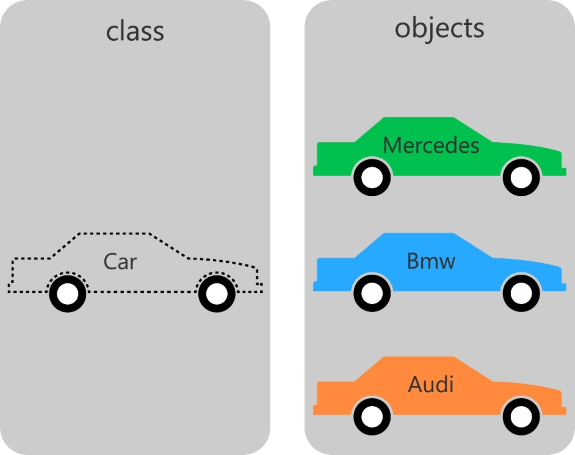

### Сводка по основным характеристикам классов Python

* Оператор `class` создает объект класса и присваивает его имени. В 
точности как оператор `def` определения функции оператор `class` является исполняемым. После достижения и запуска он генерирует новый объект класса и присваивает его имени, указанному в заголовке `class`. Также подобно `def` операторы `class` обычно выполняются при первом импортировании файлов, где они находятся.
* Присваивания внутри операторов `class` создают атрибуты классов. Как и в файлах модулей, присваивания на верхнем уровне внутри оператора `class` (не вложенные в `def`) генерируют атрибуты в объекте класса. Формально оператор `class` определяет локальную область видимости, которая превращается в пространство имен атрибутов для объекта класса подобно глобальной области видимости модуля. После выполнения оператора `class` атрибуты класса доступны посредством уточнения с помощью имени: объект.имя.
* Атрибуты класса снабжают объект состоянием и поведением. Атрибуты объекта класса хранят информацию о состоянии и описывают поведение, которое разделяется всеми экземплярами, создаваемыми из класса; операторы `def` определения функций, вложенные внутрь `class`, генерируют методы, которые обрабатывают экземпляры.

### Сводка по основным характеристикам экземпляров класса

* Обращение к объекту класса как к функции создает новый объект экземпляра. При каждом обращении к классу он создает и возвращает новый объект экземпляра. Экземпляры представляют конкретные элементы в предметной области программы.
* Каждый объект экземпляра наследует атрибуты класса и получает собственное пространство имен. Объекты экземпляров, созданные из классов, являются новыми пространствами имен. Объекты экземпляров начинают свое существование пустыми, но наследуют атрибуты, имеющиеся в объектах классов, из которых они были сгенерированы.
* Присваивания атрибутам аргумента `self` в методах создают атрибуты для отдельного экземпляра. Внутри функций методов класса первый аргумент (по соглашению называемый `self`) ссылается на обрабатываемый объект экземпляра;
присваивания атрибутам аргумента `self` создают либо изменяют данные в экземпляре, но не в классе.

Классы определяют общие разделяемые данные и поведение плюс генерируют экземпляры. Экземпляры отражают конкретные сущности приложения и хранят собственные данные, которые могут варьироваться от объекта к объекту.

## Шаг 1: создание экземпляров

Наша первая задача — начать написание кода главного класса - `Person`. 

В Python принято довольно строгое соглашение начинать имена модулей с буквы нижнего регистра, а имена классов — с буквы верхнего регистра.

Первое, что мы хотим делать с помощью класса `Person`, связано с регистрацией основных сведений о людях — заполнением полей записей, атрибутов объекта экземпляра.

Нормальный способ предоставления атрибутам экземпляра первоначальных значений предусматривает их присваивание через `self` в методе конструктора
`__ init__` , который содержит код, автоматически выполняемый Python каждый раз,
когда создается экземпляр. Давайте добавим к классу метод конструктора:



In [2]:
# Добавление инициализации полей записи
class Person:
  def __init__(self, name, job=None, pay=0): # Конструктор принимает три аргумента
    self.name = name # Заполнить поля при создании
    self.job = job # self - новый объект экземпляра
    self.pay = pay

В терминах ООП аргумент `self` является вновь созданным объектом экземпляра, a `name`, `job` и `pay` становятся информацией о состоянии — описательными данными, сохраняемыми в объекте для использования в будущем.

Такой код означает, что при создании экземпляров `Person` нам необходимо передавать имя, но аргументы `job` и `pay` теперь необязательны; они получат стандартные значения None и 0, когда опущены. Как обычно, аргумент `self` заполняется Python автоматически для ссылки на объект экземпляра — присваивание значений атрибутам `self` присоединяет их к новому экземпляру.

Пока что класс `Person` делает не особо многое (по существу он всего лишь заполняет поля новой записи), но является реальным рабочим классом.

In [3]:
if __name__ == '__main__': # Используется для тестирования
  bob = Person('Bob Smith') # Тестирование класса
  sue = Person('Sue Jones', job='dev', pay=100000) # Автоматически выполняет__init__
  print(bob.name, bob.pay) # Извлечение присоединенных атрибутов
  print(sue.name, sue.pay) # Атрибуты sue и bob отличаются

Bob Smith 0
Sue Jones 100000


Обратите внимание, что объект `bob` принимает стандартные значения для `job` и
`pay`, но объект `sue` предоставляет значения явно. Также взгляните на то, как применяются ключевые аргументы при создании `sue`. Мы могли бы взамен передавать аргументы по позиции, но ключевые аргументы могут помочь вспомнить назначение данных в более позднее время и позволяют передавать аргументы в любом желаемом порядке слева направо. 

Формально `bob` и `sue` являются объектами пространств имен — подобно всем экземплярам классов каждый из них имеет собственную независимую копию
информации о состоянии, созданную классом. Из-за того, что каждый экземпляр класса располагает своим набором атрибутов `self`, классы оказываются естественным инструментом для регистрации сведений для множества объектов. Как и встроенные типы вроде списков и словарей, классы служат своего рода фабриками объектов.

## Шаг 2: добавление методов, реализующих поведение



In [4]:
if __name__ == '__main__': # Используется для тестирования
  bob = Person('Bob Smith') # Тестирование класса
  sue = Person('Sue Jones', job='dev', pay=100000) # Автоматически выполняет__init__
  print(bob.name, bob.pay) # Извлечение присоединенных атрибутов
  print (sue.name, sue.pay) # Атрибуты sue и bob отличаются
  print(bob.name.split()[-1]) # Извлечение фамилии из объекта
  sue.pay *= 1.10 # Предоставление этому объекту повышения
  print('%.2f' % sue.pay)

Bob Smith 0
Sue Jones 100000
Smith
110000.00


Предыдущий код работает, как было запланировано, но если вы покажете его опытному разработчику программного обеспечения, то он, скорее всего, сообщит вам, что такой универсальный подход — не особо хорошая идея для воплощения на практике.

Жесткое кодирование операций вроде этих за пределами класса может привести к проблемам с сопровождением в будущем.

Скажем, что если вы жестко закодируете способ извлечения фамилии во многих местах программы? Когда его понадобится изменить (например, для поддержки
новой структуры имени), то вам придется отыскать и обновить каждое вхождение.

### Написание кода методов

На самом деле мы здесь хотим задействовать концепцию проектирования программного обеспечения, известную как инкапсуляция — помещение операционной логики в оболочку интерфейсов, чтобы код каждой операции был написан только один раз в программе. Тогда если в будущем возникнет необходимость в изменении, то изменять нужно будет только одну копию.

Выражаясь терминами Python, мы хотим поместить код операций над объектами
в методы класса, а не засорять ими всю программу. Фактически это одно из дел, с которыми классы справляются очень хорошо — вынесение кода с целью устранения избыточности и в итоге повышения удобства сопровождения.



In [5]:
# Добавление методов для инкапсуляции операций с целью повышения удобства сопровождения
class Person:
  def __init__(self, name, job=None, pay=0):
    self.name = name
    self.job = job
    self.pay = pay

  def lastName(self): # Методы реализации поведения
   return self.name.split()[-1] # self - подразумеваемый объект

  def giveRaise(self, percent):
    self.pay = int(self.pay * (1 + percent)) # Потребуется изменять только здесь

if __name__ == '__main__':
  bob = Person('Bob Smith')
  sue = Person('Sue Jones', job='dev', pay=100000)
  print(bob.name, bob.pay)
  print(sue.name, sue.pay)
  print (bob.lastName(), sue.lastName()) # Использовать новые методы
  sue.giveRaise(.10)                     # вместо жесткого кодирования
  print(sue.pay)



Bob Smith 0
Sue Jones 100000
Smith Jones
110000


Как уже известно, методы представляют собой нормальные функции, которые присоединяются к классам и предназначены для обработки экземпляров этих классов.
Экземпляр является подразумеваемым объектом вызова метода и передается в аргументе `self` автоматически.

## Шаг 3: перегрузка операций

### Реализация отображения

Измененить отображение объектов можно, задействовав перегрузку операций — написать код методов в классе, которые перехватывают и обрабатывают встроенные операции, когда выполняются на экземплярах класса. В частности, мы можем использовать вторые по частоте применения в Python методы перегрузки операций после `__ init__`: метод `__ rерr__`, который мы реализуем здесь, и его двойник `__ str__`.

Методы выполняются автоматически каждый раз, когда экземпляр преобразуется в
свою строку вывода.

Формально `__ str__` предпочтительнее `print` и `str`, а `___rерr__` используется в качестве запасного варианта для данных ролей и во всех остальных контекстах.

Метод конструктора `__ init__` , код которого мы уже написали, строго говоря,
тоже является перегрузкой операции — он выполняется автоматически во время создания для инициализации нового экземпляра. Тем не менее, конструкторы настолько распространены, что они не выглядят похожими на особый случай.

In [6]:
print(sue) # Стандартный формат отображения для объекта экземпляра

In [7]:
# Добавление методов для инкапсуляции операций с целью повышения удобства сопровождения
class Person:
  def __init__(self, name, job=None, pay=0):
    self.name = name
    self.job = job
    self.pay = pay

  def lastName(self): # Методы реализации поведения
   return self.name.split()[-1] # self - подразумеваемый объект

  def giveRaise(self, percent) :
    self.pay = int(self.pay * (1 + percent)) # Потребуется изменять только здесь

  def __repr__ (self): # Добавленный метод
    return '[Person: %s, %s]' % (self.name, self.pay) # Строка для вывода

if __name__ == '__main__':
  bob = Person('Bob Smith')
  sue = Person('Sue Jones', job='dev', pay=100000)
  print(bob)
  print(sue)

[Person: Bob Smith, 0]
[Person: Sue Jones, 100000]


## Шаг 4: настройка поведения за счет создания подклассов

На текущем этапе наш класс реализует большую часть механизма ООП в Python:
он создает экземпляры, снабжает поведением в методах и даже немного перегружает
операции, чтобы перехватывать операции вывода в `__ герг__` . Он фактически упаковывает наши данные и логику вместе в единственный автономный программный компонент, облегчая нахождение кода и его изменение в будущем. Разрешая нам инкапсулировать поведение, он также дает возможность выносить такой код во избежание избыточности и связанных затруднений при сопровождении.

Не охваченной осталась только одна значительная концепция ООП — настройка
через **наследование**. В некотором смысле мы уже привлекали к делу наследование, потому что экземпляры наследуют методы от своих классов. Однако для демонстрации реальной мощи ООП необходимо определить отношение суперкласс/подкласс, которое позволит расширять наше программное обеспечения и замещать унаследованные линии поведения.

### Написание кода подклассов

В качестве следующего шага давайте задействуем методологию ООП для применения и настройки нашего класса `Person`, расширив имеющуюся программную иерархию. В целях рассматриваемого учебного пособия мы определим подкласс класса
`Person` по имени `Manager`, который замещает унаследованный метод `giveRaise` более специализированной версией.

`class Manager(Person):` - мы определяем новый класс по имени `Manager`, который унаследован от суперкласса `Person` и может добавлять настройки. Говоря проще, класс `Manager` очень похож на `Person`, но `Manager` располагает специальным способом получения повышений.

Существуют два способа написания кода для такой настройки класса `Manager`: хороший и плохой. 

**Расширение методов: плохой способ**

Мы начнем с плохого способа, т.к. он может быть чуть легче для понимания. Плохой способ заключается в том, чтобы вырезать код `giveRaise` из класса `Person` и вставить его в класс `Manager`, после чего модифицировать:


In [8]:
class Manager(Person): # Наследование атрибутов Person
  def giveRaise(self, percent, bonus=.10): # Переопределение с целью настройки
    self.pay = int(self.pay * (1 + percent + bonus)) # Плохой способ: вырезание и вставка

Проблема здесь имеет очень общий характер: всякий раз, когда вы копируете код
посредством вырезания и вставки, то по существу удваиваете объем работ по сопровождению в будущем. Подумайте об этом: поскольку мы копируем первоначальную версию, если когда-либо понадобится изменить способы выдачи повышений (что наверняка произойдет), то нам придется модифицировать код в двух местах, а не в одном.

**Расширение методов: хороший способ**

Что мы действительно хотим здесь сделать — каким-то образом расширить исходный метод `giveRaise` вместо его полного замещения. Хороший способ в Python предусматривает вызов исходной версии напрямую с дополненными аргументами:

In [9]:
class Manager(Person):
  def giveRaise(self, percent, bonus=.10):
    Person.giveRaise(self, percent + bonus) # Хороший способ: расширение исходной версии

В коде задействован тот факт, что метод класса всегда может быть вызван либо через экземпляр (обычный способ, когда Python автоматически передает экземпляр аргументу `self`), либо через класс (менее распространенная схема, при которой экземпляр должен передаваться вручную). Если более конкретно, то вспомните, что нормальный вызов метода следующего вида:

`экземпляр.метод(аргументы ...)`

автоматически транслируется Python в такую эквивалентную форму:

`класс.метод(экземпляр, аргументы ...)`

В ряде случаев мы просто обязаны вызывать через класс `Person`,
т.к. вызов `self.giveRaise()` внутри кода `giveRaise` в `Manager` привел бы к зацикливанию. Дело в том, что `self` уже представляет собой экземпляр `Manager`, т.е. вызов `self.giveRaise()` был бы распознан снова как `Manager.giveRaise` и так далее рекурсивно до тех пор, пока не исчерпается доступная память.

“Хорошая” версия может выглядеть мало отличающейся в плане кода, но она
способна значительно изменить будущее сопровождение кода — так как теперь логика
`giveRaise` расположена лишь в одном месте (метод класса `Person`), у нас есть только одна версия, подлежащая модификации в будущем, если в том возникнет необходимость.

In [10]:
# Добавление методов для инкапсуляции операций с целью повышения удобства сопровождения
class Person:
  def __init__(self, name, job=None, pay=0):
    self.name = name
    self.job = job
    self.pay = pay

  def lastName(self): # Методы реализации поведения
   return self.name.split()[-1] # self - подразумеваемый объект

  def giveRaise(self, percent) :
    self.pay = int(self.pay * (1 + percent)) # Потребуется изменять только здесь

  def __repr__ (self): # Добавленный метод
    return '[Person: %s, %s]' % (self.name, self.pay) # Строка для вывода

class Manager(Person):
  def giveRaise(self, percent, bonus=.10):
    Person.giveRaise(self, percent + bonus) # Хороший способ: расширение исходной версии

if __name__ == '__main__':
  bob = Person('Bob Smith')
  sue = Person('Sue Jones', job='dev', pay=100000)
  print(bob)
  print(sue)


  tom = Manager('Tom Jones', 'mgr', 50000) # Создать экземпляр Manager: __init__
  tom.giveRaise(.10) # Выполняется специальная версия
  print(tom.lastName()) # Выполняется унаследованный метод
  print(tom) # Выполняется унаследованный__repr__




[Person: Bob Smith, 0]
[Person: Sue Jones, 100000]
Jones
[Person: Tom Jones, 60000]


Здесь все выглядит хорошо: экземпляры `bob` и `sue` такие же, как прежде, а когда экземпляр `Manager` по имени `tom` получает повышение на 10%, то на самом деле становится обладателем 20% (его оплата возрастает с 50 000 до 60 000), потому что настроенная версия `giveRaise` из `Manager` выполняется только для него. Также обратите внимание, что вывод экземпляра `tom` как единого целого в конце тестового кода отображает элегантный формат, определенный в методе `__герг__` класса `Person`: объекты `Manager` получают код `__герг__`, `lastName` и метода конструктора `__ init__` “бесплатно” от `Person` благодаря наследованию.

Чтобы сделать приобретение унаследованного поведения еще более удивительным, мы можем временно добавить в конец файла следующий код (демонстрация понятия **полиморфизма** в Python):


In [11]:
if __name__ == '__main__': # Вот какой в результате получается вывод (новые строки выделены полужирным):
  print('--All three--')
  for obj in (bob, sue, tom): # Обработать объекты обобщенным образом
    obj.giveRaise(.10) # Выполнить метод giveRaise этого объекта
    print(obj) # Выполнить общий метод__герг__
    
    


--All three--
[Person: Bob Smith, 0]
[Person: Sue Jones, 110000]
[Person: Tom Jones, 72000]


Практический эффект данного кода заключается в том, что экземпляр `sue` получает дополнительно 10%, но экземпляр `tom` — 20%, потому что выбор метода `giveRaise` координируется на основе типа объекта. Как уже известно, полиморфизм является центральной частью гибкости Python. Скажем, передача любого из трех объектов функции, которая вызывает метод `giveRaise`, дала бы такой же результат: в зависимости от типа переданного объекта автоматически выполнилась бы подходящая версия.

## Шаг 5: настройка конструкторов

Код работает в том виде, как есть, но если вы более внимательно исследуете текущую версию, то столкнетесь с небольшой странностью — указание названия должности `mgr` для объектов `Manager` при их создании кажется бессмысленным: это вытекает из самого класса. Было бы лучше иметь возможность каким-то образом заполнять данное значение автоматически, когда создается экземпляр `Manager`.



In [13]:
# Добавление методов для инкапсуляции операций с целью повышения удобства сопровождения
class Person:
  def __init__(self, name, job=None, pay=0):
    self.name = name
    self.job = job
    self.pay = pay

  def lastName(self): # Методы реализации поведения
   return self.name.split()[-1] # self - подразумеваемый объект

  def giveRaise(self, percent) :
    self.pay = int(self.pay * (1 + percent)) # Потребуется изменять только здесь

  def __repr__ (self): # Добавленный метод
    return '[Person: %s, %s]' % (self.name, self.pay) # Строка для вывода

class Manager(Person):
  def __init__ (self, name, pay) : # Переопределить конструктор
    Person.__init__ (self, name, 'mgr', pay) # Выполнить исходный c job='mgr'
  def giveRaise(self, percent, bonus=.10):
    Person.giveRaise(self, percent + bonus) # Хороший способ: расширение исходной версии

if __name__ == '__main__':
  bob = Person('Bob Smith')
  sue = Person('Sue Jones', job='dev', pay=100000)
  tom = Manager('Tom Jones', 50000) # Название должности не требуется:
  print(tom.job)                    # Оно устанавливается классом

mgr


Положительный аспект здесь в том, что вы можете явно указывать аргумент для передачи конструктору суперкласса или даже вообще не вызывать его: отказ от вызова конструктора суперкласса позволяет вместо расширения полностью замещать его логику.

### Объектно-ориентированное программирование проще, чем может казаться

Несмотря на свои относительно небольшие размеры, в такой полной форме наши
классы охватывают почти все важные концепции механизма ООП в Python:
* создание экземпляров — заполнение атрибутов экземпляров;
* методы, реализующие поведение — инкапсуляция логики в методах класса;
* перегрузка операций — обеспечение линии поведения для встроенных операций вроде вывода;
* настройка поведения — переопределение методов в подклассах для их специализации;
* настройка конструкторов — добавление логики инициализации к шагам суперкласса.

Большинство перечисленных концепций основаны всего лишь на трех простых идеях: поиск атрибутов в иерархии наследования в форме деревьев объектов, особый
аргумент `self` в методах и автоматическое сопоставление перегруженных операций с методами.

Попутно мы также сделали наш код легким для изменения в будущем, используя предрасположенность класса к вынесению кода с целью сокращения избыточности. Скажем, мы поместили логику внутрь методов и вызывали методы суперкласса из расширений, чтобы избежать наличия множества копий того же самого кода.
Большинство таких шагов были естественным ростом структурной мощи классов.

В общем и целом это все, что есть в Python для ООП. Безусловно, классы могут становиться крупнее, чем было здесь продемонстрировано, и существуют более сложные
концепции, связанные с классами, такие как декораторы и метаклассы. Однако с точки зрения основ наши классы уже
воплощают все упомянутые ранее концепции.

### Другие способы комбинирования классов

Далее представлена реазилация для расширения Manager, путем внедрения класса Person, а не наследуяся от него.

Показанная ниже альтернатива реализует такой прием за счет использования метода для перегрузки операции `__ getattr__`, чтобы перехватывать извлечения неопределенных атрибутов и делегировать выполнение работы внедренному объекту посредством встроенной функции `getattr`.

В действительности `ManagerDelegation` становится уровнем контроллера, передающим вызовы *вниз* внедренному объекту, а не *вверх* методам суперкласса.

In [16]:
class ManagerDelegation:  # Альтернативная версия, основанная на внедрении
    def __init__(self, name, pay):
        self.person = Person(name, 'mgr', pay)  # Внедрить объект Person

    def giveRaise(self, percent, bonus=.10):
        self.person.giveRaise(percent + bonus)  # Перехватить и делегировать

    def __getattr__(self, attr):
        return getattr(self .person, attr)  # Делегировать все остальные атрибуты

    def __repr__(self):
        return str(self.person)  # Снова должен быть перегружен

if __name__ == '__main__':
    tom = ManagerDelegation('Tom Jones', 50000)  
    print(tom)

[Person: Tom Jones, 50000]


Гипотетический класс `Department`, подобный показанному ниже, мог бы агрегировать другие объекты с целью их трактовки как набора.


In [17]:
class Department:
  
  def __init__(self, *args):
    self.members = list(args)

  def addMember(self, person):
    self.members.append(person)

  def giveRaises(self, percent):
    for person in self.members:
      person.giveRaise(percent)

  def showAll(self):
    for person in self.members:
      print(person)

if __name__ == '__main__':
  bob = Person('Bob Smith')
  sue = Person('Sue Jones', job='dev', pay=100000)
  tom = Manager('Tom Jones', 50000)
  development = Department(bob, sue) # Внедрить объекты в составной объект
  development.addMember(tom)
  development.giveRaises(.10) # Выполняет giveRaise внедренных объектов
  development.showAll() # Выполняет__repr__ внедренных объектов


[Person: Bob Smith, 0]
[Person: Sue Jones, 110000]
[Person: Tom Jones, 60000]


Интересно отметить, что в коде применяются *наследование* и *композиция* — `Department` является составным объектом, который внедряет и управляет другими объектами для агрегирования, но сами внедренные объекты `Person` и `Manager` для настройки используют наследование.

Наследование лучше всего подходит при реализации расширений, основанных на прямой настройке (подобных нашей специализации `Manager` из класса `Person`). Композиция хорошо подходит в сценариях, где множество объектов агрегируются в единое целое и управляются классом уровня контроллера.
Наследование передает вызовы вверх для многократного использования, а композиция передает их вниз для делегирования. 

## Шаг 6: использование инструментов интроспекции

### Специальные атрибуты класса

Инструменты интроспекции Python — специальные атрибуты и функции, которые обеспечивают доступ к внутренностям
реализаций объектов. Эти инструменты довольно сложны и, как правило, используются теми, кто создает инструменты для применения другими программистами, а не программистами, которые разрабатывают прикладные приложения.

* Встроенный атрибут `экземпляр.__ class__` предоставляет ссылку из экземпляра на класс, из которого экземпляр был создан. В свою очередь классы имеют
атрибут `__ name__`, в точности как модули, и последовательность `__ bases__`, обеспечивающую доступ к суперклассам. Мы можем их здесь применять для вывода имени класса, из которого создавался экземпляр, вместо жестко закодированного имени.

In [18]:
print(bob.__class__)
print(tom.__class__)
print(bob.__class__.__name__)
print(bob.__class__.__bases__)
print(tom.__class__.__bases__)

<class '__main__.Person'>
<class '__main__.Manager'>
Person
(<class 'object'>,)
(<class '__main__.Person'>,)



* Встроенный атрибут `объект.__ dict__` предоставляет словарь с одной парой “ключ-значение” для каждого атрибута, присоединенного к объекту пространства имен (включая модули, классы и экземпляры). Поскольку это словарь, мы можем извлекать список его ключей, индексировать по ключу, проходить по его ключам и т.д. для обработки всех атрибутов обобщенным образом.

In [21]:
print(bob.__dict__)
print(list(bob.__dict__.keys()))

for key in bob.__dict__:
    print(key, '=>', bob.__dict__[key])

for key in bob.__dict__:
    print(key, '=>', getattr(bob, key))

{'name': 'Bob Smith', 'job': None, 'pay': 0}
['name', 'job', 'pay']
name => Bob Smith
job => None
pay => 0
name => Bob Smith
job => None
pay => 0



### Обобщенный инструмент отображения

Мы можем задействовать эти интерфейсы в суперклассе, который отображает точные имена классов и форматирует все атрибуты экземпляра любого класса.

Из-за того, что его перегруженный метод отображения `__repr__` применяет обобщенные инструменты интроспекции, он будет работать на любом экземпляре независимо от набора атрибутов экземпляра. И поскольку он является классом, то автоматически становится универсальным инструментом форматирования: благодаря наследованию его можно соединять с любым классом, в котором желательно использовать такой формат отображения. В качестве дополнительного бонуса, если мы когда-либо захотим изменить способ отображения экземпляров, тогда понадобится модифицировать только этот класс, т.к. любой класс, который наследует его метод `__rерr__`, при следующем своем запуске подхватит новый формат:

In [22]:
"Смешанные утилиты и инструменты для классов"


class AttrDisplay:
    """
    Предоставляет наследуемый метод перегрузки отображения, который показывает
    экземпляры с их именами классов и пары имя=значение для каждого атрибута,
    сохраненного в самом экземпляре (не атрибутов, унаследованных от классов).
    Может соединяться с любым классом и будет работать на любом экземпляре.
    """

    def gatherAttrs(self):
        attrs = []
        for key in sorted(self.__dict__):
            attrs.append('%s=%s' % (key, getattr(self, key)))
        return ', '.join(attrs)

    def __repr__(self):
        return '[%s: %s]' % (self.__class__.__name__, self.gatherAttrs())


if __name__ == '__main__':
    class TopTest(AttrDisplay):
        count = 0

        def __init__(self):
            self.attr1 = TopTest.count
            self.attr2 = TopTest.count + 1
            TopTest.count += 2

    class SubTest(TopTest):
        pass

x, y = TopTest(), SubTest()  # Создать два экземпляра
print(x)  # Показать все атрибуты экземпляров
print(y)  # Показать имя класса, расположенного ниже всех


[TopTest: attr1=0, attr2=1]
[SubTest: attr1=2, attr2=3]


Когда этот модуль запускается напрямую, его код самотестирования создает два экземпляра и выводит их; определенный здесь метод `__rерr__` показывает имя класса экземпляра плюс имена и значения всех его атрибутов, отсортированные по имени атрибута.

In [23]:
"""
Регистрирует и обрабатывает сведения о людях.
Для тестирования классов из этого файла запустите его напрямую.
"""


# Использовать обобщенный инструмент отображения AttrDisplay
class Person(AttrDisplay):  # Комбинирование с классом верхнего уровня
    """
    Создает и обрабатывает записи о людях
    """
    def __init__(self, name, job=None, pay=0):
        self.name = name
        self.job = job
        self.pay = pay

    def lastName(self):  # Предполагается, что фамилия указана последней
        return self.name.split()[-1]

    def giveRaise(self, percent):  # Процент должен находиться между 0 и 1
        self.pay = int(self.pay * (1 + percent))


class Manager(Person):
    """
    Настроенная версия Person co специальными требованиями
    """
    def __init__(self, name, pay):
        Person.__init__(self, name, 'mgr', pay)  # Должность подразумевается

    def giveRaise(self, percent, bonus=.10):
        Person.giveRaise(self, percent + bonus)


In [29]:
if __name__ == '__main__':
    bob = Person('Bob Smith')
    sue = Person('Sue Jones', job='dev', pay=100000)
    tom = Manager('Tom Jones', 50000)
    print(bob)
    print(sue)
    print(tom)

[Person: job=None, name=Bob Smith, pay=0]
[Person: job=dev, name=Sue Jones, pay=100000]
[Manager: job=mgr, name=Tom Jones, pay=50000]


Такое отображение полезнее, чем было ранее. Однако в более широком плане наш класс отображения атрибутов стал универсальным инструментом, который посредством наследования мы можем комбинировать с любым классом, чтобы задействовать определяемый им формат отображения. Кроме того, все его клиенты будут автоматически подхватывать будущие изменения, вносимые в наш инструмент.

## Шаг 7: сохранение объектов в базе данных

Тем не менее, хотя наши классы работают, как было запланировано, создаваемые ими объекты не являются настоящими записями базы данных. То есть если мы уничтожим сеанс Python, то наши экземпляры исчезнут — они представляют собой временные объекты в памяти и не сохраняются на более постоянном носителе вроде файла, поэтому не будут доступными при будущих запусках программы. Оказывается, сделать объекты экземпляров постоянными несложно с помощью средства Python под названием
постоянство объектов, которое обеспечивает существование объектов после
прекращения работы создавшей их программы.

### Модули pickle, dbm и shelve
Постоянство объектов реализуется тремя стандартными библиотечными модулями, доступными во всех версиях Python.

* **pickle**

Сериализирует произвольные объекты Python в строку байтов и десериализирует их обратно.

* **dbm**

Реализует файловую систему с доступом по ключу для хранения строк.

* **shelve**

Применяет предшествующие два модуля для хранения объектов Python в файле
по ключу.


---

### Сохранение в бд
Сохранение в примере будет произведено посредством хранилища `shelve`. Мы всего лишь импортируем модуль `shelve`, открываем новое хранилище с внешним именем, присваиваем объекты по ключам в хранилище и по завершении закрываем хранилище, потому что в него были внесены изменения:


In [25]:
import shelve
db = shelve.open('persondb')  # Имя файла, в котором хранятся объекты
for obj in (bob, sue, tom):  # Использовать атрибут name в качестве ключа
    db[obj.name] = obj  # Сохранить объект в shelve по ключу
db.close ()  # Закрыть после внесения изменений


Обратите внимание на то, как мы присваиваем объекты хранилищу `shelve` с применением собственных имен объектов в качестве ключей. Мы поступаем так ради
удобства; в хранилище `shelve` ключом может быть любая строка, в том числе та, которую мы могли бы создать для обеспечения уникальности, используя такие средства, как идентификаторы процессов и отметки времени (доступные в стандартных библиотечных модулях `os` и `time`). Единственная норма — ключи обязаны быть строками и должны быть уникальными, т.к. мы можем сохранять только один объект на ключ, хотя этот объект может быть списком, словарем или другим объектом, содержащим
внутри себя множество объектов.

Стандартный библиотечный модуль `glob` в Python позволяет получать в коде перечни файлов в каталогах, чтобы проверять наличие в них файлов, и мы можем открывать файлы в текстовом или двоичном режиме для исследования строк и байтов:

In [26]:
import glob
glob.glob('person*')

['persondb.db']

### Чтение из бд

In [27]:
db = shelve.open('persondb')  # Повторно открыть хранилище shelve
print(len(db))  # Сохранены три 'записи'
print(list(db.keys()))  # Ключи являются индексом
bob = db['Bob Smith']  # Извлечь объект bob по ключу
print(bob)  # Выполняет __repr__ из AttrDisplay
print(bob.lastName())  # Выполняет lastName из Person

for key in sorted(db):  # Проход по сортированным ключам
    print(key, '=>', db[key])

3
['Bob Smith', 'Sue Jones', 'Tom Jones']
[Person: job=None, name=Bob Smith, pay=0]
Smith
Bob Smith => [Person: job=None, name=Bob Smith, pay=0]
Sue Jones => [Person: job=dev, name=Sue Jones, pay=100000]
Tom Jones => [Manager: job=mgr, name=Tom Jones, pay=50000]


Обратите внимание, что для загрузки либо использования сохраненных объектов импортировать классы `Person` или `Manager` необязательно. Скажем, мы можем свободно вызвать метод `lastName` объекта `bob` и автоматически получить специальный формат отображения, несмотря на отсутствие в области видимости класса `Person`, к которому `bob` относится. Подобное возможно потому, что при сохранении посредством `pickle` экземпляра класса Python записывает его атрибуты экземпляра `self`
вместе с именем класса, из которого он был создан, и модуля, где класс находится.

Когда объект `bob` позже извлекается из хранилища `shelve` и воссоздается с помощью `pickle`, то Python автоматически повторно импортирует класс и связывает с ним `bob`.

### Обновление данных в бд

In [28]:
db = shelve.open('persondb')  # Повторно открыть хранилище shelve

for key in sorted(db):  # Проход по сортированным ключам
    print(key, '=>', db[key])

sue = db['Sue Jones']  # Извлечь объект bob по ключу
sue.giveRaise(.10)
db['Sue Jones'] = sue
print(db['Sue Jones'])  # Обновления в хранилище
db.close()  # Закрытие после внесения обновлений

Bob Smith => [Person: job=None, name=Bob Smith, pay=0]
Sue Jones => [Person: job=dev, name=Sue Jones, pay=100000]
Tom Jones => [Manager: job=mgr, name=Tom Jones, pay=50000]
[Person: job=dev, name=Sue Jones, pay=110000]


# Подытожим

Реализованы:
1.   Наследование (`Manager` наследует поведение класса `Person`)
2.   Инкапсуляция (Методы в классах)
3.   Перегрузка операций, в частности `__repr__`
4.   Универсальный класс представления данных `AttrDisplay`
5.   Сохранение в бд (хранилище `shelve`)

Идеи на будущее:
1.   Добавление проверок на корректность данных
2.   Расширение логики работы с данными (новые методы, классы)
3.   Применение таких инструментов, как графические пользовательские интерфейсы, веб-сайты, веб-службы, базы данных, средства объекто-реляционного отображения.

## Оценка качества кода

In [31]:
%%pycodestyle
class AttrDisplay:
    """
    Предоставляет наследуемый метод перегрузки отображения, который показывает
    экземпляры с их именами классов и пары имя=значение для каждого атрибута,
    сохраненного в самом экземпляре (не атрибутов, унаследованных от классов).
    Может соединяться с любым классом и будет работать на любом экземпляре.
    """

    def gatherAttrs(self):
        attrs = []
        for key in sorted(self.__dict__):
            attrs.append('%s=%s' % (key, getattr(self, key)))
        return ', '.join(attrs)

    def __repr__(self):
        return '[%s: %s]' % (self.__class__.__name__, self.gatherAttrs())


# Использовать обобщенный инструмент отображения AttrDisplay
class Person(AttrDisplay):  # Комбинирование с классом верхнего уровня
    """
    Создает и обрабатывает записи о людях
    """
    def __init__(self, name, job=None, pay=0):
        self.name = name
        self.job = job
        self.pay = pay

    def lastName(self):  # Предполагается, что фамилия указана последней
        return self.name.split()[-1]

    def giveRaise(self, percent):  # Процент должен находиться между 0 и 1
        self.pay = int(self.pay * (1 + percent))


class Manager(Person):
    """
    Настроенная версия Person co специальными требованиями
    """
    def __init__(self, name, pay):
        Person.__init__(self, name, 'mgr', pay)  # Должность подразумевается

    def giveRaise(self, percent, bonus=.10):
        Person.giveRaise(self, percent + bonus)


INFO:pycodestyle:46:1: W391 blank line at end of file


# Заключение

На данной странице Jupiter Notebook мы исследовали все основы классов Python и ООП в действии (основываясь на главе 28), построив
простой, но реалистичный пример шаг за шагом. Мы добавили конструкторы, методы, перегрузку операций, настройку с помощью подклассов и инструменты интроспекции, а также попутно ознакомились с другими концепциями, такими как композиция, делегирование и полиморфизм.

В итоге мы взяли объекты, созданные нашими классами, и сделали их постоянными за счет сохранения в базе данных объектов `shelve` — легкой в применении системы для сохранения и извлечения собственных объектов Python по ключу.